<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/main/Vyimov%20Zorislav/ZorislavVyymov_Internship_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Результаты выполнения задачи "Оценка кадидатов по резюме" с использованием обучаемой нейросети**

## Общие положения

Данный ноутбук составлен в рамках решения задачи разработки нейросети для выполнения предсказаний о степени приемлемости для компании-работодателя соискателя работы по его резюме, размещенном на ресурсах типа "Head hunter" и аналогичных.

Цель - разработать прототип системы, реализующей функцию рекомендательной системы для HR-специалиста компании.

Для решения задачи были проведены исследования данных Датасета, предоставленного Заказчиком, и проведена серия экспериментов по подбору оптимальной архитектуры нейросетей, обрабатывающих данные предоставленного образца. Дополнительно  проведены эксперименты, направленные на оптимизацию параметров применяемых нейросетей.

К сожалению, предоставленного Заказчиком материала оказалось крайне недостаточно для полноценной разработки функциональности нейропомощника HR-специалиста. В предоставленном Датасете присутствует всего 500 экземпляров резюме, часть из которых является дубляжом (повторением одних и тех же резюме с различной датой обновления на сайте). При этом, предоставленный Датасет содержит только 11 примеров резюме, подходящих для компании, тогда как все остальные - примеры неподходящих. Таким образом, Датасет сильно не сбалансирован.

Тем не менее, предпринята попытка прототипизирования системы на этом скудном Датасете. Предполагается, что Пользователем в дальнейшем будет использоваться значительно более полный Датасет, содержащий большее количество размеченных экземпляров, на котором нейросеть будет обучаться перед использованием в качестве предсказателя пригодности соискателя для компании. Большее количество обучающего материала должно повысить качество предсказаний.

Предлагаемая для использования в данном ноутбуке обучаемая нейросеть является составной, состоящей из 5 совмещенных нейросетей, каждая из которых обрабатывает определенную ей часть данных из резюме, в сопоставлении с разметкой Заказчика, предоставленной в вариантах "да" и "нет", что указывает на приемлемость соискателя для компании, без указания на степень его привлекательности. Результаты раздельной обработки частей входящих данных объединяются с вычислением итоговой регрессии - числового выражения приемлемости соискателя для компании.

Следует заметить, что подаче данных в нейросеть предшествует автоматическая предобработка данных, содержащихся в резюме, с целью очистки от элементов, не несущих смысловой нагрузки, а так же, по возможности, - для категоризации и нормализации данных.

Кроме того, данные, подаваемые в отдельные ветки составной неросети, частично пересекаются. Это сделано для выполнения задания Заказчика учесть возможное наличие важных данных в нецелевых категориях (столбцах) Датасета.

Дополнительно, учтено пожелание Заказчика создать условия для дообучения нейросети на новых данных. Для этого, в частности, используются внешние алгоритмы токенизации текстов и словари, что устраняет проблему возможного присутствия в загружаемом датасете слов, отсутствующих при обучении, но близких к ним по смыслу. Эти компоненты загружаются в ноутбук из специализированных внешних ресурсов автоматически, каждый раз при запуске процесса обучения нейросети, что обеспечивает их актуальность.

С этой же целью обеспечения обучения нейросети на новых данных, ноутбук построен так, что перед выполнением предсказаний модель обучается каждый раз вновь, на вновь загруженном Датасете. Предполагается, что Заказчик постепенно будет обогащать свой Дататсет новыми и выверенными данными, на которых будет обучаться нейросеть.

Для избежания переобучения модели из-за таких серьезных проблем Датасета, как дисбаланс представленных классов данных (когда экземпляров одного класса значительно (на порядки) больше, чем экземпляров другого класса), используется автоматическая функция выравнивания данных, подаваемых на обучение, путем дублирования данных миноритарного класса их копиями до количества, сопоставимого с мажоритарным классом. Таким образом, на обучение нейросети подается примерное равное количество экземпляров резюме подходящих и неподходящих для компании.
Кроме того, используются автоматические функции остановки обучения НС при отсутствии прогресса в минимизации ошибок предсказаний. Такие проверочные предсказания выполняются на проверочной части данных, доля которых выделяется автоматически из загружаемого Датасета.



Для выполнения оценки новых резюме, используется обученная модель нейросети с такими весами нейронных связей, применение которых показали наилучшие результаты при обучении. Эти веса модели сохраняются в нотбуке на время сеанаса работы с ним (файл best_model.h5), а сама модель используется для выполнения предсказаний в соответствующем блоке ноутбука.


Ноутбук снабжен подробными инструкциями по его использованию, а код Python в исполняемых ячейках подробно прокомментирован, что, в общем, не должно вызывать сложностей для Пользователя и не требует от него особых навыков.

## Инструкции по использованию ноутбука

1. Рекомендуется создать и сохранить копию данного ноутбука и работать с  рабочей копией. Это обеспечит возможность для Пользователя возврата к исходной копии в случае утраты работоспособности рабочего экземпляра в результате случайного внесения изменений в исполняемый код во время рабты с ноутбуком.

2. Ноутбук, помимо информационных разделов "Общие положения" и "Инструкции по использованию ноутбука" состоит из двух функциональных блоков в отдельных разделах:
*   Блок обучения нейросети на данных компании
*   Блок выполнения предсказаний нейросетью

Блок выполнения предсказаний содержит исполняемый код с использованием функций, определенных в блоке обучения. Поэтому, во избежание ошибок и сбоев, ячейки блока выполнения предсказаний должны запускаться после выполнения кода в блоке обучения. Таким образом, устанавливается последовательность работы с ноутбуком:
*  сначала запускается ячейки блока обучения,
*  затем выполняются ячейки блока предсказаний.

3. В обоих блоках используется свой загружаемый набор данных:
*   В блоке обучения это  - размеченный Пользователем Датасет - набор резюме, по отношению к которым в отдельном поле "Подходит - да/нет" установлено одно из значенией на усмотрение Пользователя. На этих данных модель нейросети учится;
*   В блоке выполнения предсказаний используется набор резюме, которые Пользователь хочет оценить с использованием обученной нейросети. В результате выполнения кода  блока выполнения предсказаний,  к содержимому загружаемого файла добавится новый столбец с результатмии предсказаний. Новый файл с названием "Результаты оценки" будет добавлен в ноутбук, где может быть просмотрен Пользователем или откуда он может быть экспортирован.

4. Для удобства Пользователя и минимизации его возможных ошибок, связанных с загрузкой данных, ему предоставлена возможность указать (выбрать) нужный для загрузки файл в рамках предусмотренных диалогов с Пользователем. Такой мини-интрефейс с Пользователем организован как в блоке обучения нейросети, так и в блоке выполнения предсказаний.

5. В обоих функциональных блоках используются специально разработанные функции предобработки загруженных данных перед их подачей в неросеть. Эти функции предобработки и преобразования входных данных в формат, воспринимаемый неросетями, разрабатывались на основе образцов данных, предоставленных Заказчиком. Для их совместимости и применимости к загружаемым данным предъявляются требования, которые Пользователь должен соблюдать:
*   Загружаемые данные должны поставляться точно в таком же формате, т.е - файлом XLSX;
*   Поля данных должны иметь точно такие же названия, которые были использованы в поставленном Разработчику Датасете;
*   В файле могут присутствовать дополнительные столбцы - они будут проигнорированы;
*   Порядок столбцов в файле может быть иным - это не повлияет на результат;
*   Содержание столбцов должно быть таким же.

Ниже приведено описание особенностей данных в некоторых отдельных полях (столбцах) поставленного Датасета, на которые надо обратить внимание при подготовке новых данных.

**Поле "Пол, возраст** ":
*   В предоставленом Датасете пол соискателя был указан в двух вариантах: "мужчина"/"женщина". Ожидается, что такие же значения будут использованы в новых экземплярах. К ошибкам не приведет сокращения "Муж"/"Жен", но, например, "М"/"Ж" не будут обработаны.
*   В предоставленном Датасете встречались экземпляры резюме без указания возраста соискателя, без или с неполной датой рождения. Ожидается, что как минимум год рождения будет указан в новых экземплярах. В этом случае возраст будет вычислен автоматически относительно текущего года, введенном Пользователем в диалоге перед загрузкой данных. В противном случае возрасту будет присвоено значение 0 и с таким значением будет обрабатываться нейросетью (соискатель будет отнесен к категории до 17 лет)


**Поле "Зарплата"**:
*   ежедневная актуализация курса валют к рублю в коде не обязательна. Она будет нужна, если курс принципально изменится. При сохранении соотношений в целом, код не не нуждается в коррекции.
*   если в новых резюме будет использоваться какая-либо новая валюта, следует добавить соответсвуюшую строчку в код парсинга данных блока обучения, по аналогии с имеющимися, с текущим курсом. В таком случае стоит актуализировать и курс всех остальных валют.


**Поле "Город"**:
  
* если в новых резюме будут использоваться какие-либо новые зарубежные страны проживания соискателя - можно добавить их, через запятую в переменную "Abroad" раздела парсинга данных блока обучения. В противном случае новое значение будет обработано как "прочие".
*   если в новых резюме ибудут использоваться какие-либо новые города-миллионники - можно добавить их в переменную "MillionCities". В противном случае новое значение будет обработано как "прочие".


**Поле "Занятость"**:

Предусмотрена обработка (учет) каждого из вариантов значений, которые присутствовали в предоставленном Разработчику Датасете. Однако, если в новых экземплярах будут содержаться новые варианты, они будут проигнорированы.

**Поле "Образование и ВУЗ**":

Предусмотренна обработка любого из вариантов значений образования в предоставленном датасете. Однако, если в новых экземплярах будут содержаться новые варианты образования, например "доктор наук" и т.п., они будут проигнорированы. Название ВУЗ в данном поле учитывается нейросетью - оно обрабатывается отдельным методом.

**Поле "Опыт"**:

В предоставленном Датасете поле содержало рабочий стаж. Ожидается, что и новые экземпляры резюме будут содержать те же данные. Обработкой предусмотрено преобразование стажа в месяцы с отнесением к одной из 11 категорий. Отсутствие данных = отсутствию стажа. При необходимости можно изменить используемую категориальность. В этом случае это надо сделать в разделе парсинга данных, в блоке обучения нейросети.


**Поле "Выполняемые задачи на прошлых местах работы"**.

В предоставленном Датасете это поле содержит большое количество "мусорных данных" (перечни, служебные символы, нумерацию разных вариантов, смайлики, интернет-ссылки и проч.), от которых необходимо избавиться перед обучением и перед предсказанием, т.к. подобный "мусор" не несет смысловой нагрузки и мешает эффективному обучению. Ожидается что и новые данные в этих же полях будут поступать такими же "замусоренными", поэтому в код предобработки данных этих текстовых полей включены различные методы очистки данных перед их оцифровкой и подачей в нейросеть как для обучения, так и для предсказания. Отдельная ветка составной нейросети обрабатывает эти данные совместно с содержанием поля "Ключевые навыки", т.к. они близки по смыслу. Пустые значения этих полей в загружаемых данных заменяются словом "неизвестно" и обрабатываются нейросетью с этим значением.

**Поле "О себе"**.

В предоставленном Датасете это поле содержит самое большое количество "мусорных данных". Предобработкой предусмотрена очистка этого поля и нормализация перед подачей в нейросеть. Содержание поля обрабатывается отдельной веткой составной неросети изолированно от всех остальных данных, т.к. результаты проведенных экспериментоа показали негативное влияние содержимого этого поля на результаты предсказаний на проверочных и уловно тестовых данных. Пустые значения этого поля в загружаемых данных заменяются словом "неизвестно" и обрабатываются нейросетью с этим значением.

**Игнорируется** содержание таких полей Датасета, как:

*   ФИО
*   Дата обновления резюме
*   Номер по порядку
*   Любое новое.







## Блок обучения нейросети на данных компании

**ВАЖНО!!!**

Перед началом работы запустите следующую ячейку кода (ниже) для загрузки компонент, необходимых для правильной работы ноутбука:

In [ ]:
# <--- Нажмите на белый треугольник в черном круге слева. После этого следуйте инструкциям в ячейках ниже.




### Сборник необходимых для работы библиотек и утилит + функции поддержки загрузки данных
# Импортируем keras
from tensorflow import keras
from tensorflow.keras import layers

# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои нейросетей
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate, ReLU, Dropout
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers.experimental import preprocessing

# Оптимизатор
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Для подключения Гугл-диска
from google.colab import drive

# Работа со временем
import time

# Чтоб рисовать в колабе:
%matplotlib inline

from tensorflow.keras.preprocessing.sequence import pad_sequences #

# Подключаем колбэки
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #

#from google.colab import files #  Для загрузки своих картинок

import random #Для генерации случайных чисел
import math # Для округления

# Запись в файлы и чтение из файлов структур данных Python
# import pickle

#import os #Для работы с файлами

from IPython.display import clear_output

from imblearn.over_sampling import RandomOverSampler

from gensim.models import KeyedVectors  # для использования внешнего словоря частотности при подготовке текстовых данных

import tensorflow as tf

import nltk

# Модуль для работы с корпусами текстовых данных из Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

#  Модуль для работы с лемматизацией текста из NLTK
from nltk.stem import WordNetLemmatizer

### Организация диалога с пользователем для ввода текущего года (используется при определении возраста соискателя) и
### для загрузки файла датасета с целью предобработки содержащихся в нем данных и для подачи в нейросеть с целью обучения.

from IPython.display import display, HTML
import pandas as pd
from google.colab import files

def get_year():
    while True:
        year_tec = input('Пожалуйста, введите текущий год (четыре цифры): ')
        if len(year_tec) == 4 and year_tec.isdigit():
            year_tec = int(year_tec)
            print(f'Принято, текущий год: {year_tec}.')
            print()
            return year_tec
        else:
            print('Вы ошиблись! Введите число, состоящее из четырех цифр и обозначающее текущий год, и повторите попытку.')

def get_dataset():
    file_input = '''
        <input type="file" id="file_input" style="display:none;">
        <label for="file_input" style="border: 1px solid #ccc; padding: 6px 48px; cursor: pointer; background-color:pink;">Теперь загрузите файл датасета в .xlsx:</label>
    '''
    display(HTML(file_input))

    uploaded = files.upload()
    filename = next(iter(uploaded))
    try:
        df = pd.read_excel(filename)
        print()
        print('Отлично, Датасет принят!')
        print()
        print('Запустите блок обучения модели нейросети (ниже) и дождитесь окончания его выполнения (примерно 11-14 мин).')
        print('После завершения обучения модели нейросети можно использовать нижеследующий блок выполнения предсказаний НС.')
        return df
    except Exception as e:
        print(f'Произошла ошибка при чтении файла: {e}. Пожалуйста, убедитесь, что файл в формате .xlsx и повторите попытку, запустив ячеку снова.')
        return None

def dialog():
    year_tec = get_year()
    dataset = get_dataset()
    return dataset, year_tec

### Организация интерфейса с пользователем для загрузки файла с резюме на оценку обученной НС

def get_test_file():
    file_input = '''
        <input type="file" id="file_input" style="display:none;">
        <label for="file_input" style="border: 1px solid #ccc; padding: 6px22px; cursor: pointer; background-color:pink;">Пожалуйста, загрузите файл с резюме для их оценки.</label>
    '''
    display(HTML(file_input))

    uploaded = files.upload()
    filename = next(iter(uploaded))
    try:
        test = pd.read_excel(filename)
        print()
        print('Отлично, файл принят!')
        print()
        print('Запустите блок оценки резюме (ниже) и дождитесь окончания его выполнения (до 1 мин).')
        print('По результатам будет собран новый файл "Результаты оценки резюме.csv", содержащий дополнительное поле "оценка резюме НС" на последней позиции.')
        print('Экспресс-обзор полученных результатов Вы можете видеть в ячейках раскрытого блока')
        return test

    except Exception as e:
        print(f'Произошла ошибка при чтении файла: {e}. Пожалуйста, убедитесь, что загружаемый файл в формате .xlsx и повторите попытку, запустив ячейку снова.')
        return None


Для загрузки данных Датасета с целью обучения/дообучения НС, запустите ячейку под заголовком "Загрузка данных Датасета" ниже. По запросу введите текущий год, а затем - укажите файл Дататсета для его автоматической загрузки (кнопкой "Выбрать файлы").

После успешной загрузки файла (Вы увидите сообщение "Дататсет принят!"), запустите блок ячеек раздела "Запуск блока обучения модели НС", не раскрывая его.

Процесс обучения НС по загруженным данным выполняется полностью автоматически.

Процесс обучения (выполнения блока ячеек) виуализируется вращением кольцевого сегмента вокруг черного фонового круга с белым квадратом внутри. Остановить процесс до его завершения можно нажатием на круг с квадратом. Возобновить невозможно. Повторный запуск раздела начинает процесс сначала.

Процесс обучения НС может занимать длительное время (от 11 мин, суммарно)

При успешном выполнении обучения НС вращение кольцевого сегмента прекратится, символ белого треугольника будет отображаться в круге черного цвета. При желании можно озакомиться с результатами обучения внутри подраздела, раскрыв его. Все выполненные ячейки в раскрытом подразделе "Запуск блока обучения модели НС" будут иметь зеленую галку и указание времени выполнения в каждой из ячеек. Промежуточные результаты выполнения скриптов (если их вывод предусмотрен) находятся под каждой из ячеек с кодом. Часть исполнительных ячеек подраздела имеет графическое представление результатов. Текстовые ячейки блоки содержат пояснения там, где это уместно или необходимо.

При неуспешном выполнении скриптов подраздела врещение кольцевого сегмента прекратится, символ белого треугольника будет отображаться в круге красного цвета.  В таком случае раскройте подраздел. Проблемная ячейка будет выделена красным цветом, а поле вывода под ней будет содержать содержание ошибки, которое, вероятнее всего связано с нарушением формата данных.
Необходимо устранить причину ошибки, после чего заново запустить ячейку и все последующие в подразделе. Можно свернуть подраздел "Запуск блока" и выполнить его запуск целиком повторно.

**Загрузка данных Датасета**

In [ ]:
# <--- Нажмите на белый треугольник в черном круге слева, после чего следуйте указаниям:
dataset, year = dialog()

Пожалуйста, введите текущий год (четыре цифры): 2023
Принято, текущий год: 2023.



Saving ДатаСет_Оценка_резюме_581_резюме_3_0_без пуст_перемеш.xlsx to ДатаСет_Оценка_резюме_581_резюме_3_0_без пуст_перемеш.xlsx

Отлично, Датасет принят!

Запустите блок обучения модели нейросети (ниже) и дождитесь окончания его выполнения (примерно 11-14 мин).
После завершения обучения модели нейросети можно использовать нижеследующий блок выполнения предсказаний НС.


### Запуск блока обучения модели НС
(запустите блок целиком, не раскрывая его)

#### Просмотр содержимого загруженного дататсета

In [ ]:
print(dataset)

     Unnamed: 0         Дата отклика  \
0            10  2023-01-24 00:00:00   
1            11  2023-01-29 00:00:00   
2            12  2023-01-23 00:00:00   
3            13  2023-02-15 00:00:00   
4            14  2023-01-23 00:00:00   
..          ...                  ...   
495         495  2022-12-05 00:00:00   
496         496  2023-02-08 00:00:00   
497         497  2023-02-03 00:00:00   
498         498  2022-12-13 00:00:00   
499         499  2023-02-01 00:00:00   

                                   Пол, возраст           ЗП  \
0      Мужчина, 36 лет, родился 22 октября 1986   не указана   
1      Мужчина, 28 лет, родился 18 октября 1994  70 000 руб.   
2     Женщина, 41 год, родилась 21 декабря 1981   не указана   
3                                       Женщина  70 000 руб.   
4     Женщина, 58 лет, родилась 17 декабря 1964   не указана   
..                                          ...          ...   
495   Женщина, 33 года, родилась 21 апреля 1989  45 000 руб.   
496    

In [ ]:
# Веденное пользователем значение текущего года:
print(year)

2023


#### Парсинг и предобработка данных дататсета

In [ ]:
### Убрать лишние столбцы в датасете
### После выполнения ячейки в поле вывода должно быть выведена строка с размерностью таблицы, после которой отображается
### часть датасета (первые 3 строки) в качестве примера. Предусмотренное блоком предобработки количество столбцов = 15

fixed_df = dataset.drop(dataset.columns[0],axis = 1)           # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1)   # Убираем первый столбец с датой отклика. Он нам не нужен
# fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с ФИО. Он нам не нужен. В обновленном датасете
# его не оказалось, поэтому строка закомментирована.
# Вывод количества резюме (количество строк в таблице) и числа оставшихся признаков (столбцов в таблице)
print(fixed_df.shape)


(500, 15)


In [ ]:
### Убрать кодировку в описаниях \xa0 \n
### Вывод ячейки не предусмотрен
i=0
for j in range(fixed_df.shape[1]):  # Для каждого из столбцов таблицы (их ожидается 15)
    for i in range(fixed_df.shape[0]): # По всем резюме (все строки)
        if type(fixed_df.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов:
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\xa0","")
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [ ]:
### Ячейка для контроля загруженных данных по одному экземпляру в датасете
#  Воспроизведение примера данных по индексу (номер строки). В выводе ячейки представлено содержимое всех оставшихся полей выбранного по индексу резюме
n = 4      # Берем резюме c указанными индексом
for i in range(len(fixed_df.values[n])): # Выводим значение каждой графы резюме указанного индекса n
  print(i, " ", fixed_df.values[n][i])

0   Женщина, 58 лет, родилась 17 декабря 1964
1   не указана
2   Product Manager в команду Финансового департамента
3   Уфа, Не готова к переезду, готова к редким командировкам
4   полная занятость
5   полный день
6   Опыт работы —34 года 6 месяцев
7   ПАО АК ВНЗМ
8   Заместитель начальника управления по налоговому учету и отчетности
9   1.Ведение/контроль бухгалтерского и налогового учета 2.Закрытие периода 3.Составление/отправка налоговых деклараций 4.Работа с ИФНС по полученным письмам 5.Консультации в части своей компетенции 6.Работа с ЛНД 7.Взаимодействие с налоговыми органами: - в части сопровождения камеральных, встречных и выездных налоговых проверок. - получение требований, подготовка документов/пояснений для ответа на требования, подготовка ответов на требования, отправка по ТКС в налоговый орган. - сверка по налогам. - урегулирование вопросов по недоимке, переплате (заявления на зачет/возврат). - работа с требованиями по уплате налогов. - работа по урегулированию вопроса при

In [ ]:
### Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице.
### Ячейка выполнится без ошибок, если названия столбцов загруженного датасета соотвествуют заданным
### Вывод яченйки не предусмотрен

COL_SEX_AGE     = fixed_df.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df.columns.get_loc('Город')
COL_EMPL        = fixed_df.columns.get_loc('Занятость')
COL_SCHED       = fixed_df.columns.get_loc('График')
COL_EXP         = fixed_df.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = fixed_df.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = fixed_df.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df.columns.get_loc('Подходит - да/нет')
COL_SKILLS      = fixed_df.columns.get_loc('Ключевые навыки')
COL_TASKS       = fixed_df.columns.get_loc('Выполняемые задачи на прошлых местах работ')
COL_ABOUT       = fixed_df.columns.get_loc('Обо мне')

##### Предобработка категориальных данных датасета

In [ ]:
### Пол. Возраст.
### Определение функции преобразования данных о поле и возрасте в поле "Пол, возраст" или COL_SEX_AGE датасета
def getParameterSexAge(arg):
    out = [0, None]         # Второе значение None будет обозначать отсутствие информации о возрасте
    if "уж" in arg:   # Если есть сочетание  литер "уж" или литера "м", тогда:
        out[0] = 1    # Первое значение поменяется на 1, обозначая мужской пол. Т.Образом, все неизменные - женщины.
    year_tec = year   # Устанавливаем текущий год (он введен ранее пользователем в блоке диалога)
    if len(arg) > 7:  # Если в поле записано более 7 символов (больше количества букв в словах "Мужчина" или "Женщина", которые есть в каждой строке),то:
        birth_year = re.findall(r'\d{4}', arg)  # Ищем четыре подряд цифры и находим год рождения
        if birth_year:  # Если определился год рождения, то
            out[1] = year_tec - int(birth_year[0])  # Вычисляем возраст и записываем вторым значением переменной out
    return out          # Вернуть значение out.  В нем вторым заначением останется None, если значение года рождения так и не нашлось


# Полученный возраст превращаем в класс возрастной категории (первая: от 0 до 17 лет; вторая начинается с совершеннолетия, 18 лет, включительно и т.д)
def getParameterAgeVect(arg):
    if arg is None:  # Если возраст равен None, обозначаем его как 0
        arg = 0
    outClass = int((arg - 13) / 5)
    outClass = max(0, min(10, outClass))
    # На выходе получаем вектор с нужной категорией возраста
    return list(utils.to_categorical(outClass, 11).astype('int'))

In [ ]:
# эта ячейка оставлена в блоке только как проверочная - для контроля работы функции с разными вариантами текста датасета
# для проверки поместите содержимое поля между кавычек в переменной S:
S = "мужчина, 42 года, родился 19 ноября 1980 года"
S1 = getParameterSexAge(S)
S2 = getParameterAgeVect (S1[-1])
S1,S2

([1, 43], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
### Зарплата, млн.руб./мес
### Определение функции преобразовании данных о зарплате соискателя. Предполагает перевод в млн руб по курсу, если ЗП указана в какой то из предусмотренных кодом валют.
### Для целей обучения не важна конкретная дата курса, если с ее изменением соотношение валют более-менее постоянное. Но при желании можно актуализировать цифры, когда потребуется.
### Актуализировать курс небходимо как в блоке "обучение", так и в блоке "предсказание"
### При необходимости, при появлении в резюме каких то новых валют, можно добавить в код соответствующую строчку, по аналогии с существующими (в обоих блоках)
def getParameterSalary(arg):
    if arg.lower().strip() == "не указана":
        return 0

    num = arg
    # Сначала получаем чистое число, убираем лишние знаки
    if (type(num) == str):                      # если  тип  == строка, тогда:
        num = re.sub(' ','',num)                # убираем все пробелы, остаются цифры
        num = re.sub('[а-яА-ЯёЁ]','',num)       # убираем всю кирилицу
        num = re.sub('[a-zA-Z]','',num)         # убираем всю латиницу
        num = num.replace('.','')               # убираем точки

        # Получаем чистую валюту, убираем цифры
        curr = re.sub('[0-9]','',arg)
        curr = curr.replace('.','').strip()

        # Конвертируем в рубли, если валюта (актуализировать курс, если надо!!!)
        if curr == 'USD':
           num = float(num)*65
        elif curr == 'руб':
           num = float(num)*1
        elif curr == 'KZT':
           num = float(num)*0.17
        elif curr=='грн':
           num = float(num)*2.6
        elif curr=='белруб':
           num = float(num)*30.5
        elif curr=='EUR':
           num = float(num)*70
        elif curr=='KGS':
           num = float(num)*0.9
        elif curr=='сум':
           num = float(num)*0.007
        elif curr=='AZN':
           num = float(num)*37.5
        else:
           num = 0  # если нет числового значения, присваиваем 0

    num = float(num)  # Приведение переменной num к типу float
    salaryStr = num/1000000.0      # приводим к млн.руб

    return salaryStr

In [ ]:
### функция векторизации значения зарплаты соискателя.

def getParameterSalaryVector(arg):  # Категориальное представление запроса ЗП:  11 категорий
    out = getParameterSalary(arg)
    outClass = 0
    if out > 0.04:  # если больше 40 тыс
        outClass = 1
    if out > 0.06:  # если больше 60 тыс
        outClass = 2
    if out > 0.1:  # если больше 100 тыс
        outClass = 3
    if out > 0.12:  # если больше 120 тыс
        outClass = 4
    if out > 0.18:  # если больше 180 тыс
        outClass = 5
    if out > 0.25:  # если больше 250 тыс
        outClass = 6
    if out > 0.4:  # если больше 400 тыс
        outClass = 7
    if out > 0.6:  # если больше 600 тыс
        outClass = 8
    if out > 0.8:  # если больше 800 тыс
        outClass = 9
    if out > 1:  # если больше 1 млн
        outClass = 10

    return list(utils.to_categorical(outClass, 11).astype('int'))


In [ ]:
### Город проживания.
### Парсинг поля "город" (COL_CITY) на три категории: СOL_CITY; COL_RELOCATION; COL_BUSINESS_TRIP
def parse_field_City(arg):
    parts = arg.split(',')

    COL_CITY = parts[0].strip() if len(parts) >= 1 else ""                        # все что до первой запятой
    COL_BUSINESS_TRIP = parts[-1].strip() if len(parts) >= 3 else ""              # все что после последней запятой
    COL_RELOCATION = ', '.join(parts[1:-1]).strip() if len(parts) >= 3 else ""    # все что между первой и последней зпт

    # Преобразование категории "COL_BUSINESS_TRIP"
    if "редким" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "не частым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "нечастым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "не готова" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    elif "не готов" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    else:
        COL_BUSINESS_TRIP = "да"

    return COL_CITY, COL_RELOCATION, COL_BUSINESS_TRIP

In [ ]:
### Функция векторизации полученых данных о городе.
### Предполагает категоризацию на 5 значений (Зарубеж (из числа предусмотренных), Москва, Санкт-Петербург, города-миллионнники, все остальные)
def getParameterCity(arg):
  MillionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"
  Abroad = "Австралия, Австрия, Ямайка, Армения, Бельгия, Сербия, Великобритания, Швеция, Германия, Дания, Израиль, Ирландия, Испания, Италия, Канада, Исландия, Бангладеш, Мальта, Китай, Андорра, Иран, Лихтенштейн, Монако, Мексика, Босния и Герцеговина, Черногория, Непал, Хорватия, Македония, Филиппины, Сент-Винсент и Гренадины, Латвия, Словения, Бахрейн, Ливия, Королевство Саудовская Аравия, Литва, Кувейт, Индонезия, Иордания, Молдавия, Словакия, Ливан, Алжир, Нидерланды, Колумбия, Республика Маврикий, Марокко, Чехия, Болгария, Польша, Вьетнам, Новая Зеландия, Люксембург, Норвегия, Шри-Ланка, ОАЭ, Индия, Катар, ЮАР, Другое, США, Греция, Турция, Финляндия, Франция, Сингапур, Румыния, Аргентина, Швейцария, Кипр, Эстония, Южная Корея, Малайзия, Мальдивская Республика, Япония, Шотландия, Нигерия, Португалия, Венгрия, Бразилия, Багамские Острова"
  if arg in Abroad:            return [1, 0, 0, 0, 0]
  if "Москва" in arg:          return [0, 1, 0, 0, 0]
  if "Санкт-Петербург" in arg: return [0, 0, 1, 0, 0]
  if  arg in MillionCities:    return [0, 0, 0, 1, 0]
  return [0, 0, 0, 0, 1]

In [ ]:
### Готовность к командировкам
### Определение функции векторизации выделенных из поля "Город" данных о готовности соискателя к командировкам.
### Предусмотрено категоризация в три варианта "не готов"/"готов"/"готов к редким командировкам"
# Данные о командировке:
def getParameterBUSINESS_TRIP(arg):
  out= [0, 0]
  if ("да" in arg):     out[0]=1
  if ("редко" in arg):  out[1]=1
  return out

In [ ]:
### Подходит/не подходит.
### Функция обработки поля датасета с метками организации.
### Предусмотрена вариативность из трех значений: 2 - любое значение, кроме "да" и "нет", включая отсутствие значений в поле; 1 - значение "да"; 0 -значение "да"
def getResult(arg):
  out = 2
  if isinstance(arg, str) and "да" in arg:      # проверка, является ли строкой подаваемый в функцию аргумент. Если нет, то out останется = 2
    out = 1
  if isinstance(arg, str) and "нет" in arg:     # проверка, является ли строкой подаваемый в функцию аргумент. Если нет, то out останется = 2. если да и содержит "нет:"
    out = 0
  return int(out)                               # привожу к целочисленному значению

In [ ]:
### Занятость.
### Определение функции векторизации категориальных данных в поле "Занятость". предусмотрено отнесение к одной или нескольким из 5 категорий с преобразованием в OHE
### Данные о желаемой занятости
def getParameterEmployment(arg):
  out= [0, 0, 0, 0, 0]
  if ("стажир" in arg):       out[0]=1
  if ("волонт" in arg):       out[1]=1
  if ("частич" in arg):       out[2]=1
  if ("неп" in arg):          out[2]=1
  if ("проект" in arg):       out[3]=1
  if ("полн" in arg):         out[4]=1
  return out


In [ ]:
 ### График.
 ### Определение функции векторизации категориальных данных в поле "График". Предусмотрено отнесение к одной или нескольким из 5 категорий с преобразованием в OHE
 ### Данные о желаемом графике работы
def getParameterSchedule(arg):
  out = [0, 0, 0, 0, 0]
  if ("гибк" in arg):         out[0]=1
  if ("полн" in arg):         out[1]=1
  if ("смен" in arg):         out[2]=1
  if ("удал" in arg):         out[3]=1
  if ("нная" in arg):         out[3]=1
  if ("вахт" in arg):         out[4]=1
  return out

In [ ]:
### Образование.
### Определение функции векторизации категориальных данных в поле "Образование и ВУЗ". Предусмотрено отнесение к одной или нескольким из 6 категорий в формате OHE.
### Навания ВУЗ, если они присуствуют, игнорируются этим кодом, но обрабатываются иными методами обработки текстовых данных
def getParameterEducation(arg):
  out = [0, 0, 0, 0, 0, 0]    # По умолчанию не указано
  if "андидат" in arg:                               out[0] = 1
  if "Высшее," in arg or "igher" in arg:             out[1] = 1   #применимо только, если строку не приводить к нижнему регистру
  if "пециаль" in arg or "редн" in arg:              out[2] = 1
  if "агистр" in arg:                                out[3] = 1
  if "акалав" in arg:                                out[4] = 1
  if " высшее" in arg:                               out[5] = 1  # "Неоконченное высшее," != "Высшее,"

  if sum(out) == 0:  # Если не найдено ни одного ключевого слова
    return out  # Возвращаем список [0, 0, 0, 0, 0, 0]

  return out

In [ ]:
### Опыт.
### Определение функции обработки и классификации данных в поле "Опыт"
### Разбор данных поля об опыте работы - результат в месяцах

def extract_experience_months(arg):
    try:
        # Выделение количества лет, преобразование в int
        years = int(re.search(r'(\d+)\s+(год.?|лет)', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Если ошибка, не прерываемся: устанавливаем количество лет равно 0
        years = 0

    try:
        # Выделение количества месяцев, преобразование в int
        months = int(re.search(r'(\d+)\s+месяц', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Неудача - количество месяцев равно 0
        months = 0

    # Возврат результата в месяцах
    return years * 12 + months


    # Категориальное представление опыта работы
def getParameterExperienceVector(arg):
  out = extract_experience_months(arg)
  outClass = 0
  if (out > 6): # если больше 6 месяцев
    outClass = 1
  if (out > 12): # если больше 12 месяцев
    outClass = 2
  if (out > 24): # если больше 24 месяцев
    outClass = 3
  if (out > 36): # если больше 36 месяцев
    outClass = 4
  if (out > 60): # если больше 60 месяцев
    outClass = 5
  if (out > 96): # если больше 96 месяцев
    outClass = 6
  if (out > 120): # если больше 120 месяцев
    outClass = 7
  if (out > 156): # если больше 156 месяцев
    outClass = 8
  if (out > 192): # если больше 192 месяцев
    outClass = 9
  if (out > 240): # если больше 240 месяцев
    outClass = 10

  return list(utils.to_categorical(outClass, 11).astype('int'))

In [ ]:
# Эта ячейка не используется в предобработке и ее работа не влияет на обучение. Она оставлена для возможности организации альтернативной обработки данных в новых
# экземплярах, при необходимости. Используется словарь, который можно пополнять, при необходимости. Подробные пояснения по работе -  в комментариях

# Разбор данных о городe и преобразование в one hot encoding.
# Работает со словарем типа "Классы городов" (в отдельной ячейке ниже)

def extract_city_to_ohe(arg):
    # Определение размерности выходного вектора
    num_classes = city_class[0]

    # Разбивка текста в arg на отдельные слова
    split_array = re.split(r'[ ,.:()?!]', arg)   # В данном случае, шаблон разделителя указан как [ ,.:()?!], который соответствует символам
                                                 # пробела, запятой, точки, двоеточия, круглых скобок, вопросительного и восклицательного знаков.
                                                 # Это означает, что всякий раз, когда встречается любой из этих символов, строка arg будет разделена на подстроки
                                                 # Пустые строки '' возникают там, где два символа-разделителя идут подряд (например, между запятой и пробелом)
    # Поиск города в строке и присвоение ему класса
    for word in split_array:
        city_cls = city_class[1].get(word, -1)   # Эта строка пытается получить значение, связанное с ключом word в словаре city_class[1].
                                                 #Если ключ word найден в словаре, то city_cls будет содержать соответствующее значение.
                                                 # Если ключ word отсутствует в словаре, то city_cls будет равно -1 (значение по умолчанию,
                                                 # указанное вторым аргументом метода get())
        if city_cls >= 0:                        # Если это условие выполняется, то цикл for прерывается. Это означает, что если элемент word
                                                 # из split_array соответствует какому-либо ключу в словаре city_class[1] и явл. положительным
            break                                # значением класса city_cls, то цикл будет прерван
    else:                                 # Внимание: for/else
        # Город не в city_class - значит его класс "прочие города"
        city_cls = num_classes - 1

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(city_cls, num_classes)

In [ ]:
# Классы городов
city_class = [0,
              {'москва'          : 0,
               'санкт-петербург' : 1,
               'новосибирск'     : 2,
               'екатеринбург'    : 2,
               'нижний новгород' : 2,
               'казань'          : 2,
               'челябинск'       : 2,
               'омск'            : 2,
               'самара'          : 2,
               'ростов-на-дону'  : 2,
               'уфа'             : 2,
               'красноярск'      : 2,
               'пермь'           : 2,
               'воронеж'         : 2,
               'волгоград'       : 2,
               'прочие города'   : 3
              }]

# Вычисление счетчика для данных разбиения
for class_desc in [city_class]:     # в [] может быть список таких же словарей и списков заданных порогов, например такого типа:
  # Список порогов возраста:
  # age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]
  # где первым элементом тоже стоит позиция для счетчика
    if isinstance(class_desc[1], list):                 # если вторая часть списка представлена типом данных "список" (list) (как age_class), то:
        class_desc[0] = len(class_desc[1]) + 1          # счетчик class_desc[0] устанавливается равным количеству элементов в списке class_desc[1],
                                                        # увеличенному на 1. Это счетчик представляет количество классов в данном случае.
    else:                                               # Если тип данных в class_desc[1] не является списком, то считается, что это словарь (dict).
        class_desc[0] = max(class_desc[1].values()) + 1 # В этом случае  счетчик class_desc[0] устанавливается равным максимальному значению в
                                                        # словаре class_desc[1], увеличенному на 1. Этот счетчик также представляет кол-во классов.

In [ ]:
# Классы занятости
employment_class = [5,                      # либо установить вручную количество классов, либо использовать код определения (представен в ячейке выше)
                    {'стажировка'          : 0,
                     'волонтерство'        : 1,
                     'не полная занятость' : 2,
                     'частичная занятость' : 2,
                     'неполная занятость'  : 2,
                     'проектная работа'    : 3,
                     'полная занятость'    : 4
                    }]

In [ ]:
### Определение общей функции преобразования строки к multi-вектору.
# На входе должны быть данные и словарь сопоставления подстрок классам

def str_to_multi(arg, class_dict):
    # Определение размерности выходного вектора
    num_classes = class_dict[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in class_dict[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [ ]:
# Разбор данных о желаемой занятости и преобразование в multi

def extract_employment_to_multi(arg):
    return str_to_multi(arg, employment_class)

In [ ]:
# Список порогов возраста
age_class = [11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]


In [ ]:
def int_to_ohe(arg, class_list):

    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [ ]:
### Ищет работу на должность.
### Для обработки данных этого поля выделено 6 классов должностей к которым определены все варианты дожностей размеченного датасета
### Классы целевой должности:
pos_class = [6,                     # либо установить вручную количество классов, либо использовать код определения класса (представлен в ячейке выше)
                    {'прочее'                                              : 0,
                     'Product Manager'                                     : 1,
                     'Growth Product Manager'                              : 1,
                     'Product Marketing Manager в Growth Hacking команду'  : 1,
                     'Product manager в Growth Hacking команду'            : 1,
                     'HR-специалист'                                       : 2,
                     'Product Manager в команду HR'                        : 2,
                     'Project manager'                                     : 3,
                     'Директор медицинской клиники'                        : 4,
                     'Product Manager в команду Финансового департамента'  : 5
                    }]
# функция преобразования строки к multi-вектору

def str_to_multi(arg, pos_class):
    # Определение размерности выходного вектора
    num_classes = pos_class[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление "1" на нужной позиции
    for value, cls in pos_class[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [ ]:
# Функция извлечения всех параметров (кроме текстовых об текущей работе, образовании, навыков, задач и информации о себе) и преобразования в вектор (оставил вариант 2)
def extract_row_data(row):

    # Извлечение и преобразование данных
    sex, age = getParameterSexAge(row[COL_SEX_AGE])                  # Пол, возраст
    sex_vec = np.array([sex])                                        # Пол в виде вектора
    age_vec = getParameterAgeVect(age)                               # Возраст в виде вектора
    city_vec = getParameterCity(parse_field_City(row[COL_CITY])[0])  # Город
    empl = extract_employment_to_multi(row[COL_EMPL])                # Тип занятости
    sched_vec = getParameterSchedule(row[COL_SCHED])                 # График работы
    educ_vec = getParameterEducation(row[COL_EDU])                   # Образование
    exper_vec = getParameterExperienceVector(row[COL_EXP])           # Опыт работы в месяцах
    salary_vec = getParameterSalaryVector(row[COL_SALARY])           # Зарплата в виде вектора
    bisunestrip = getParameterBUSINESS_TRIP(parse_field_City(row[COL_CITY])[2])  # Готовность к командировкам
    pos_vec = str_to_multi(row[COL_POS_SEEK], pos_class)             # Целевая должность в виде вектора
    result = getResult(row[СOL_RESULT])                              # результат разметки Заказчиком

    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([sex_vec,
                        age_vec,
                        city_vec,
                        empl,
                        sched_vec,
                        educ_vec,
                        exper_vec,
                        salary_vec,
                        bisunestrip,
                        pos_vec])

    # Возврат входных данных и выходных (результат разметки)
    return x_data, result


# Создание общей выборки
def construct_train_data(row_list):
    x_data = []
    y_data = []

    for row in row_list:
        x, y = extract_row_data(row)
        # if y[0] > 0:                      # Вариант добавления данных только при выполнении заданного условия по значениям датасета (вариации могут быть разными, в нашем случае это не нужно)
        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [ ]:
# Формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)

In [ ]:
### Ячейка контроля векторизации категориальных данных датасета.
### Вывод ячеки должен содержать размерность обучающей выборки (количество строк датасета и длину суммарного выходного вектора (63)), а так же
### пример векторизации одной из строчек резюме с выбранным индексом в выборхах x и y
### Форма наборов параметров и результата:
print('x_train.shape:', x_train_02.shape)
print('y_train.shape:', y_train.shape)

# Пример обработанных данных
n = 10
print('Пример результата векторизации данных в строке n (x_train[n]):', x_train_02[n])
print('Пример результата векторизации данных в строке n (y_train[n]):', y_train[n])

x_train.shape: (500, 63)
y_train.shape: (500,)
Пример результата векторизации данных в строке n (x_train[n]): [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Пример результата векторизации данных в строке n (y_train[n]): 1


##### Предобработка текстовых данных датасета

Для предобработки части текстовых данных датасета используется внешний словарь русских слов. Это необходимо для того, что бы учесть вероятную возможность подачи в нейросеть новых данных, содержащих слова, которых не было в распоряжении при подготовке НС и ее обучениии, но возможно близких к ним по смыслу. Используется внешний ресурс. Использованный код предусматривает его загрузку, распаковку и сохранение в ноутбуке на время сеанса работы с ним в колабе.

In [ ]:
# Примерное время выполнения ячейки  = 35 сек. Вывод ячейки сообщит об успешной загрузке файла в ноутбук:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz  # - это команда wget, которая загружает
#  файл "cc.ru.300.vec.gz" с предобученными векторными представлениями слов на русском языке с указанного URL-адреса.

--2023-08-02 17:44:02--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ru.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 65.8.248.124, 65.8.248.127, 65.8.248.22, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|65.8.248.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1306357571 (1.2G) [binary/octet-stream]
Saving to: ‘cc.ru.300.vec.gz’

cc.ru.300.vec.gz    100%[===================>]   1.22G  80.4MB/s    in 18s     

2023-08-02 17:44:20 (67.5 MB/s) - ‘cc.ru.300.vec.gz’ saved [1306357571/1306357571]



In [ ]:
# Примерное время выполнения ячейки = 1 мин. Вывод ячейки сообщит результат распаковки файла в ноутбуке в нужную дирректорию
!gunzip cc.ru.300.vec.gz          # это команда gunzip, которая распаковывает файл "cc.ru.300.vec.gz" и создает распакованную версию файла "cc.ru.300.vec".
!mkdir vector_cache/              # - это команда mkdir, которая создает новый каталог (папку) с названием "vector_cache" для хранения файла с векторными представлениями слов.
!mv cc.ru.300.vec vector_cache/   #  - это команда mv, которая перемещает файл "cc.ru.300.vec" внутрь созданной ранее папки "vector_cache".
##  Таким образом, после выполнения этих команд мы  получаем  файл "cc.ru.300.vec" с предобученными векторными представлениями слов на русском языке внутри папки "vector_cache".

mkdir: cannot create directory ‘vector_cache/’: File exists



Код в ячейке ниже загружает предобученную модель word2vec на русском языке, используя библиотеку gensim и класс KeyedVectors для работы с word2vec моделями.
После выполнения кода, переменная fasttext_model будет содержать предобученную модель word2vec, и вы можете использовать ее для получения векторных представлений (embeddings) слов. Примерное время выполнения кода в ячейке ниже  - свыше 7 мин.

In [ ]:
# Примерное время выполнения ячейки более 7 мин. Вывод ячейки не предусмотрен
# Загрузка модели FastText
fasttext_path = '/content/vector_cache/cc.ru.300.vec'
# fasttext_path = 'cc.ru.300.vec'
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_path, binary=False)


###### Предобработка текста о месте работы и должности

In [ ]:
# Выкачиваем данные по текущему месту работы и должности из полей "Последнее/нынешное место работы" и "Последняя/нынешняя должность"
def getXTrainTProf(values):
  xTrainTProf = []

  for val in values:
    currText = ""
    if (type(val[СOL_CUR_PL_WORK]) != float):
      currText += val[СOL_CUR_PL_WORK]
    if (type(val[COL_POS_PREV ]) != float):
      currText += " " + val[COL_POS_PREV]

    xTrainTProf.append(currText)

  xTrainTProf = np.array(xTrainTProf)

  return xTrainTProf

In [ ]:
# Вытаскиваю из дататсета текстовые данные для формирования обучающей выборки.
xTrainTProf = getXTrainTProf(fixed_df.values)
print(xTrainTProf[13])              # пример места работы и должности из [n]-го резюме

Уфимский государственный авиационный технический университет Главный бухгалтер


In [ ]:
# Функция для преобразования текстовых данных в векторы
def text_to_vector(text):
    words = text.lower().split()
    word_vectors = []
    for word in words:
        if word in fasttext_model.key_to_index:
            word_vector = fasttext_model.get_vector(word)
            word_vectors.append(word_vector)
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros(300)  #  300  - задаваемая размерность векторов FastText
    return text_vector


In [ ]:
# Применение функции для формирование выборки текстовых даных об текущей/последней работе соискателя
xTrainTProfVectors = [text_to_vector(text) for text in xTrainTProf]
xTrainTProfVectors = np.array(xTrainTProfVectors)

print(xTrainTProfVectors[2])  # Векторное представление для [n]-го резюме (указать вместо n индекс строки)
print(xTrainTProfVectors[2].shape)

[ 3.09599992e-02 -3.34799998e-02 -1.06600001e-02 -2.09800005e-02
  1.02200005e-02  3.71999992e-03 -2.06400007e-02  2.00001523e-05
  3.37999989e-03 -2.11800002e-02  8.19999911e-03  3.17599997e-02
  3.17000002e-02  1.05800005e-02 -1.07000005e-02 -2.85000000e-02
  5.25999954e-03 -6.62000012e-03 -1.73400007e-02  6.09999988e-03
  1.66200008e-02 -2.85400040e-02 -7.18000066e-03 -1.89199988e-02
  4.52600010e-02  2.24999990e-02  2.58600004e-02 -6.69999933e-03
  4.85799983e-02 -1.43799987e-02  3.82000068e-03 -1.31200012e-02
 -2.20200010e-02 -1.99799985e-02  8.70000012e-03 -1.11400001e-02
  1.18199997e-02 -7.50799999e-02  3.90000036e-03  1.00999996e-02
 -1.51799992e-02 -1.79200005e-02 -3.50000001e-02  2.61799991e-02
 -4.11599986e-02  2.16199998e-02 -3.47600020e-02  1.72000006e-03
  7.84000009e-03  3.50599959e-02 -6.53999904e-03  3.13600004e-02
  1.74000044e-03  3.26600000e-02 -3.28800008e-02 -8.87999963e-03
  7.20000011e-04  1.05600003e-02 -1.86000078e-03 -1.73400007e-02
 -3.02000018e-03  1.78399

Полученный вектор представляет собой числовое представление текста, созданное с использованием алгоритма word2vec. Этот вектор содержит информацию о семантическом значении слов и их контекстных отношениях в исходном тексте, что требовалось по условиям ТЗ. Размерность вектора задана (300)

###### Предобработка текста об образовании

Для предобработки этой категории текстовых данных используется словарь частостности, составленных на основе только слов загруженного датасета, поскольку только размеченные заказчиком днные и имеет смысл учитывать, а близкие по значению иные слова бессмсленны в названиях ВУЗов.

После выполнения кода ниже, tokenizer будет обучен на текстовых данных, что можно будет использовать для преобразования текстов в числовые/векторные представления перед обучением нейронной сети на данных.

In [ ]:
# Функция извлечения данных об образовании из нужного столбца датасета ("Образование и ВУЗ")
def getXTrainTEduc(values):
  xTrainTEduc = []

  for val in values:
    currText = ""
    if (type(val[COL_EDU]) != float):
      currText += val[COL_EDU]

    xTrainTEduc.append(currText)

  xTrainTEduc = np.array(xTrainTEduc)

  return xTrainTEduc

In [ ]:
# Вытаскиваем данные резюме для выборки
xTrainTEduc = getXTrainTEduc(fixed_df.values)
print(xTrainTEduc[8]) # Пример профессии [n]-го резюме

Высшее, 1999, Huron University USA in London, 1997, ACCA The Chartered Association of Certified Accountants, 1994, Всероссийская академия внешней торговли, Москва, 1985, Плехановский институт народного хозяйства


In [ ]:
# Преобразовывание  текстовых данных в числовые/векторные для обучения НС
maxWordsCount = 5000 # макс.кол-во слов/индексов, учитываемое при обучении текстов.
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(xTrainTEduc)
items = list(tokenizer.word_index.items())

In [ ]:
print(items)

[('unknown', 1), ('университет', 2), ('высшее', 3), ('государственный', 4), ('уфа', 5), ('башкирский', 6), ('москва', 7), ('им', 8), ('и', 9), ('технический', 10), ('уфимский', 11), ('институт', 12), ('среднее', 13), ('академия', 14), ('московский', 15), ('санкт', 16), ('специальное', 17), ('2022', 18), ('национальный', 19), ('2021', 20), ('колледж', 21), ('при', 22), ('экономический', 23), ('2020', 24), ('исследовательский', 25), ('2018', 26), ('2013', 27), ('2012', 28), ('управления', 29), ('магистр', 30), ('н', 31), ('государственной', 32), ('службы', 33), ('2010', 34), ('в', 35), ('2017', 36), ('бакалавр', 37), ('2019', 38), ('экономики', 39), ('2009', 40), ('2014', 41), ('петербург', 42), ('2015', 43), ('м', 44), ('российской', 45), ('авиационный', 46), ('г', 47), ('неоконченное', 48), ('медицинский', 49), ('2016', 50), ('педагогический', 51), ('школа', 52), ('нефтяной', 53), ('президенте', 54), ('филиал', 55), ('2008', 56), ('петербургский', 57), ('2006', 58), ('российский', 59),

In [ ]:
# Преобразование текста в последовательность индексов, согласно частотному словарю
xTrainEducIndexes = tokenizer.texts_to_sequences(xTrainTEduc) # Обучающие тесты в индексы

Создание обучающей выборки по тестовым данным об образовании:


In [ ]:
xTrainEduc01 = tokenizer.sequences_to_matrix(xTrainEducIndexes) # Подаем xTrain в виде списка чтобы метод успешно сработал
n = 20
print(xTrainEduc01.shape)         # Размер обучающей выборки, сформированной по Bag of Words
print(xTrainTEduc[n])             # Данные об образовании из n-го резюме
print(xTrainEduc01[n])            # Пример из отформатированной выборки
print(xTrainEduc01[n][0:100])     # Пример из отформатированной выборки (первая сотня)
print(y_train[n])

(500, 5000)
Высшее, 2006, Государственное образовательное учреждение высшего профессионального образования «Башкирская Академия Государственной Службы и Управления при Президенте Республики Башкортостан», 1993, Всесоюзный ордена Знака Почета заочный финансово-экономический институт
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]
0


In [ ]:
xTrainEduc01.shape, y_train.shape

((500, 5000), (500,))

###### Предобработка текстовых данных по ключевым навыкам соискателя

Новые загружаемые данные могут иметь новые слова, семантическая связка котрых с используемыми при обучении важна. Поэтому в предобработке этого поля используется предобученная модель word2vec и внешний словарь.

In [ ]:
# Выкачиваю данные по ключевым навыкам
def getXTrainTSkills(values):
  xTrainTSkills = []

  for val in values:
    currText = ""
    if (type(val[COL_SKILLS]) != float):
      currText += val[COL_SKILLS]

    xTrainTSkills.append(currText)

  xTrainTSkills = np.array(xTrainTSkills)

  return xTrainTSkills

In [ ]:
# Вытаскиваю из дататсета текстовые данные для выборки
xTrainTSkills = getXTrainTSkills(fixed_df.values)
print(xTrainTSkills[3])              # пример места работы и должности из [n]-го резюме

Управление бухгалтерией Бухгалтерская отчетность Налоговая отчетность Налоговое планирование Оптимизация налогообложения Бюджетирование Финансовое планирование Оптимизация затрат Внутренний аудит Управленческая отчетность


In [ ]:
# Использование ранее определенной функции text_to_vector для преобразования текстовых данных о навыках в векторы

xTrainTSkillsVectors = [text_to_vector(text) for text in xTrainTSkills]
xTrainTSkillsVectors = np.array(xTrainTSkillsVectors)

print(xTrainTSkillsVectors[3])  # Векторное представление для [n]-го резюме
print(xTrainTSkillsVectors[3].shape)

[ 1.00842100e-02 -1.16263153e-02 -1.63684250e-03 -2.14157887e-02
 -1.23052625e-02 -2.43210532e-02  1.00473687e-02  2.20526326e-02
  1.60526317e-02  8.28421116e-03  1.37789473e-02  1.84315797e-02
 -1.11263171e-02 -1.93157885e-03 -9.52631410e-04 -1.64894722e-02
  7.63157941e-03  5.89473115e-04 -1.41526302e-02  3.87842096e-02
 -2.35368423e-02 -1.93421058e-02 -3.39052603e-02  4.78947349e-03
  1.78947393e-02  5.26315812e-03 -1.71052583e-03 -3.05263209e-04
  1.23999985e-02  3.15792167e-05  2.03157905e-02 -5.99473715e-03
 -4.12947349e-02 -7.11578922e-03  2.70789508e-02 -1.27894748e-02
  4.16105241e-02 -6.57736808e-02 -3.62263173e-02  6.31052582e-03
  5.59473643e-03 -7.05789262e-03 -2.15578955e-02 -1.23473676e-02
 -1.09315785e-02  1.03210537e-02 -2.24789474e-02  5.53684309e-03
  6.27368316e-03  1.25526339e-02 -3.79473669e-03  4.15789254e-04
 -7.67894695e-03  4.25368398e-02 -9.81578976e-03  1.45789527e-03
  8.90526362e-03  2.78947322e-04  6.46842085e-03  6.31578965e-03
 -6.31052582e-03  1.65315

###### Предобработка текстовых данных о выполняемых задачах


Эта категория текстовых данных очень взаимосвязана с ключевыми навыками соискателя и во многом пересекается с ними. Поэтому целесообразна их совместная обработка с использованием алгоритма word2vec.  Однако, проблема этой категории данных в их "замусоренности". Код ниже предусматривает очистку данных от ненужных элементов. Кроме того, часто встречается отсутствие каких-либо данных в этих полях. В таких случаях в поле добавляется и далее обрабатывается слово "неизвестно", что несет определенную смысловую нагрузку.

In [ ]:
# определяем функцию предобработки текста
def preprocess_text(text):

    # Удаление интернет-ссылок
    text = re.sub(r'http\S+|www\S+', '', text)

    # Заменить слеш на пробел:
    text = re.sub(r'/', ' ', text)

    # Заменить запятую на пробел:
    text = re.sub(r',', ' ', text)

    # Удаление нумерации
    text = re.sub(r'\b\d+(\.\d+)?\s*', '', text)  # будет искать числа с точкой, за которыми следует еще одно число, а затем возможны пробелы, и заменять их на пустое значение.
    text = re.sub(r'^\s*\d+[.)]\s*', '', text)    # Это позволяет удалить нумерацию, которая обычно представлена в виде 1), 2), 3), и т.д., в начале строки.
    text = re.sub(r'\b\d+[.)]\s*', '', text)      # шаблон \b соответствует границе слова, поэтому нумерация будет удаляться независимо от ее позиции в тексте

    # Заменить точку на пробел:
    text = text.replace('.', ' ')

    # Удаление смайликов
    text = re.sub(r'[^\w\s]|_+', '', text)

    # Приведение к нижнему регистру
    text = text.lower()

    # Удаление символов пунктуации
    text = re.sub(r'[^\w\s]', '', text)

    # Удаление лишних пробелов
    text = re.sub(r'\s+', ' ', text)

    # Удаление символа перевода строки
    text = text.replace('\n', '')

    return text


In [ ]:
# дополнительное улучшение текста:

nltk.download('stopwords')
nltk.download('wordnet')

# определяем новую функцию предобработки текста (с Заглавной буквы в навании)
def Preprocess_text(text):
    text = preprocess_text(text)
    # Токенизация. Текст разбивается на отдельные токены (слова) с помощью метода split().
    tokens = text.split()

    # Удаление стоп-слов (часто встречающиеся слова, которые не несут смысловой нагрузки) с помощью модуля nltk.corpus.stopwords.
    stop_words = set(stopwords.words('russian'))
    tokens = [token for token in tokens if token not in stop_words]

    # Лемматизация токенов (приведение их к их базовой форме) с помощью модуля nltk.stem.WordNetLemmatizer.
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Объединение токенов обратно в текст. Токены объединяются обратно в текст с помощью метода join().
    processed_text = ' '.join(tokens)

    return processed_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Функция извлечения и объединения данных датасета (к содержанию "Ключевые навыки" добавляется "Выполняемые задачи"). "Пусто" меняется на "неизвестно"
def preprocess_skills_tasks(row):
    skills = row[COL_SKILLS] if pd.notnull(row[COL_SKILLS]) else "неизвестно"
    tasks = row[COL_TASKS] if pd.notnull(row[COL_TASKS]) else "неизвестно"
    combined_text = skills + " " + tasks
    return Preprocess_text(combined_text)

In [ ]:
# Формирование выборки для обучения НС данными об навыках и задачах
xTrainTSkillsTasks = fixed_df.apply(lambda row: preprocess_skills_tasks(row), axis=1)
xTrainTSkillsTasksVectors = [text_to_vector(text) for text in xTrainTSkillsTasks]
xTrainTSkillsTasksVectors = np.array(xTrainTSkillsTasksVectors)


In [ ]:
# Проверка выполнения предобработки полей в [n]-ом резюме:
print(xTrainTSkillsTasks[1])

настройка пк управление персоналом активные продажи банковское кассовое обслуживание кредитные договоры административное управление документооборот word m excel m powerpoint управление закупками торговля склад склад управление складом автоматизация процессов управления персоналом мотивация персонала массовый подбор персонала подбор персонала обучение персонала hr работа команде работа поставщиками кадровое планирование адаптация персонала управление сотрудниками регионах поиск персонала открытых источниках проведение переговоров ориентация результат crm сборка пк подключение интернета заведение заявок обучение персонала управление персоналом человек массовый подбор персонала обучение наставничество проведение собеседований менеджер продажам наставник обучал стажёров управление персоналом выставлял задачи мерчандайзинг работа клиентами обучение проведение ревизий инвентаризация инвентаризация нескольких тт работа тсд пересчет ручную свое ип массовый подбор адаптация персонала проведение

In [ ]:
print(xTrainTSkillsTasksVectors[1])  # Векторное представление для [n]-го резюме
print(xTrainTSkillsTasksVectors[1].shape)

[ 3.85237224e-02 -3.24449129e-02 -7.88728800e-03 -2.94152601e-03
  2.02288199e-03 -1.18338987e-02  7.68559519e-03  3.69322021e-03
 -4.84999781e-03 -2.01652497e-02  3.39576416e-03  2.67466176e-02
  3.77881550e-03  2.99644005e-02 -1.77406762e-02 -2.74745724e-03
 -2.03186460e-02  6.68728957e-03 -2.42830478e-02  3.12771238e-02
 -1.12542463e-03 -2.53389813e-02 -2.04126928e-02  2.02966053e-02
  2.24423856e-02 -1.30271167e-02  2.65000039e-03 -3.41779809e-03
 -1.15847716e-03  1.04152486e-02  9.47966147e-03 -1.93762649e-02
 -1.46779688e-02 -2.08940711e-02  1.78203359e-02  9.17796104e-04
  4.57703434e-02 -1.07899152e-01 -5.07203490e-03  1.07491547e-02
 -1.68983010e-03 -1.96889900e-02 -6.10872842e-02  1.71474535e-02
 -1.54499933e-02  2.85118688e-02  1.25839030e-02 -2.35762680e-03
 -3.05762608e-03  4.13813582e-03 -1.94661168e-03 -7.20335884e-05
  8.48135632e-03  1.94313545e-02 -3.30398269e-02  1.36186450e-03
  2.42203381e-03  2.42389776e-02 -3.88703346e-02 -2.97906771e-02
 -1.89898312e-02  1.06576

###### Предобработка текстовых данных "о себе"

Эта часть данных в резюме самая неструктурированная и сильно "замусорена", если вообще заполнена. Эксперементы показали, что обученные модели предсказывают лучше, если эту часть данных вообще игнорировать при обучении. Однако, есть вероятность того, что в новые экземпляры будут содержать более качественные данные, а так же что содержание этого поля все же имеет ценность для компании-нанимателя. Поэтому принято решение включить обработку данных этого поля в отдельной ветке составной нейросети. При необходимости, эту часть обработки будет легко отключить.

In [ ]:
# Функция извлечения данных датасета "О себе". "Пусто" меняется на "неизвестно"
def preprocess_about(row):
    about = row[COL_ABOUT] if pd.notnull(row[COL_ABOUT]) else "неизвестно"
    return Preprocess_text(about)

In [ ]:
# Формирование выборки для обучения НС данным о себе только
xTrainTAbout = fixed_df.apply(lambda row: preprocess_about(row), axis=1)
xTrainTAboutVectors = [text_to_vector(text) for text in xTrainTAbout]
xTrainTAboutVectors = np.array(xTrainTAboutVectors)

In [ ]:
# Проверка выполнения предобработки полей в [n]-ом резюме:
print(xTrainTAbout[1])

стрессоустойчивый энергичный нацелен результат знаю пк свои пальцев ворд excel c ремонт пк прошивка телефонов ремонт


In [ ]:
print(xTrainTAboutVectors[1])  # Векторное представление для [n]-го резюме
print(xTrainTAboutVectors[1].shape)

[ 0.06929375 -0.1128125  -0.03863749 -0.01006875 -0.00254375 -0.02008125
 -0.00965     0.019825    0.0180875  -0.08613125 -0.06030625  0.03920625
  0.01348125  0.08581249 -0.06386251  0.01923125  0.04836875  0.00583125
 -0.08806876  0.0466375  -0.03275625 -0.01735625 -0.05434375 -0.019425
 -0.016175   -0.033475    0.056325    0.00969375 -0.01125625  0.00635625
 -0.00166875 -0.0474125   0.02235    -0.03711875  0.034475    0.0306875
  0.02803125 -0.18402502 -0.00576875 -0.03195    -0.0561375  -0.05350625
 -0.07638124  0.01499375  0.005675   -0.0293125   0.03158125 -0.0072
 -0.0232875   0.0491875   0.04866875  0.02295    -0.0169875  -0.01144375
 -0.051075   -0.02408125 -0.024225   -0.00313125 -0.0822125  -0.0395625
 -0.052625   -0.013525   -0.07440625  0.02768125 -0.060475    0.010625
  0.0663875   0.00921875  0.04073125 -0.0244125   0.0199      0.0519625
 -0.03098125 -0.07464375  0.0100375  -0.00799375  0.03088125  0.05935
 -0.05548751 -0.04384375 -0.00891875  0.06262501  0.0546875  -0.0

Данные готовы для подачи в сеть

#### Набор моделей НС

#####  Модель для простых табличных данных

Для задачи регрессии, где требуется оценивать пригодность кандидата на основе табличных данных из резюме, можно использовать нейронную сеть с выходным слоем, который будет предсказывать числовое значение. Однако, если на выходе должно быть только оценка в форме "подходит" или "не подходит", можно преобразовать в задачу бинарной классификации, где выходной слой будет иметь один нейрон с сигмоидальной активацией.

Вариант кода создания простой нейронной сети для решения данной задачи:

In [ ]:
# Функция отрисовки графика истории обучения.
def plot_training_history(history):
    # Получение значений потерь и точности из истории обучения
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    # Создание графика
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Потери в тренировке')
    plt.title('Потери в тренировке')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'r-', label='Точность обучения')
    plt.title('Точность обучения')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/50
16/16 [==============================] - 1s 9ms/step - loss: 0.3322 - accuracy: 0.9700
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.1170 - accuracy: 0.9780
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.1034 - accuracy: 0.9780
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0986 - accuracy: 0.9780
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0942 - accuracy: 0.9780
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9780
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9780
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9780
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9780
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9780
Epoch 11/50
16/16 [

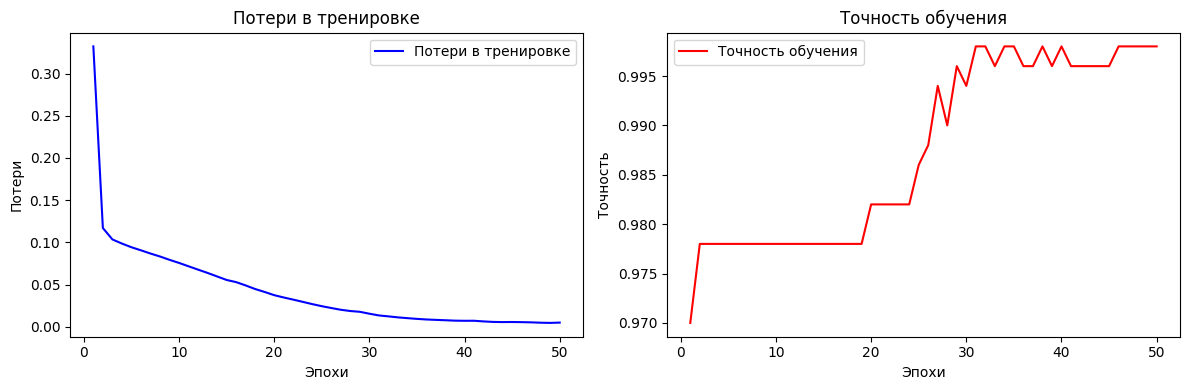

In [ ]:
# Вариант обучения на датасете.
# Предварительно выполнены: Загрузка и предобработка данных
# x_train - входные данные (табличные параметры из резюме)
# y_train - выходные данные (оценка пригодности)

# Создание модели
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(63,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train_02, y_train, epochs=50, batch_size=32)

# Оценка модели
loss, accuracy = model.evaluate(x_train_02, y_train)
print("Потери:", loss)
print("Точность:", accuracy)

# Отрисовка графика истории обучения
plot_training_history(history)


В этом примере последний слой имеет один нейрон и функцию активации сигмоид.

Модель компилируется с оптимизатором 'adam', функцией потерь 'binary_crossentropy' (так как у нас два класса: "да" и "нет") и метрикой точности (accuracy).

Модель обучается на данных x_train и y_train в течение 50 эпох с размером пакета 32. Обученная модель оценивается на тех же данных для вычисления значения потерь и точности.

 ##### Модель для текстовых данных о текущей работе и должности

Нижеприведенная модель адаптирована под изменения предобработанных данных по текущей работе соискателя.

Epoch 1/100
4/4 [==============================] - 2s 99ms/step - loss: 0.3391 - accuracy: 0.9125 - val_loss: 0.6182 - val_accuracy: 0.9700
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1851 - accuracy: 0.9750 - val_loss: 0.5817 - val_accuracy: 0.9700
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1299 - accuracy: 0.9800 - val_loss: 0.5505 - val_accuracy: 0.9700
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0907 - accuracy: 0.9825 - val_loss: 0.5241 - val_accuracy: 0.9700
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0871 - accuracy: 0.9850 - val_loss: 0.5025 - val_accuracy: 0.9700
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0789 - accuracy: 0.9875 - val_loss: 0.4860 - val_accuracy: 0.9700
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0647 - accuracy: 0.9900 - val_loss: 0.4729 - val_accuracy: 0.9700
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 4ms/step


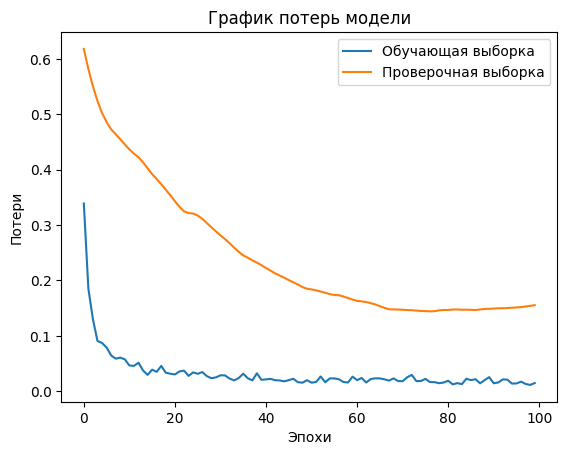

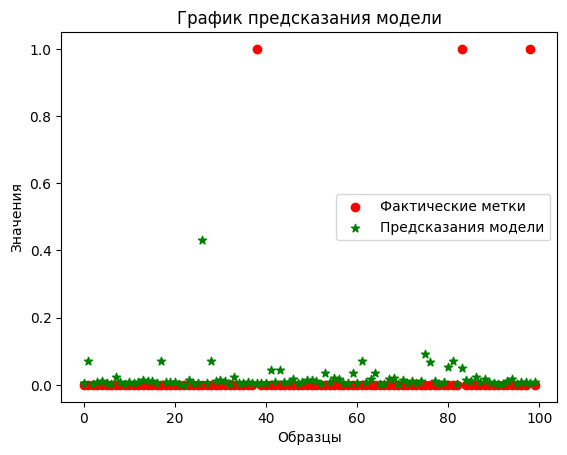

In [ ]:
# Модель для обучения тексту об месте работы и должности
x_train_02, y_train = construct_train_data(fixed_df.values)

# Разделение на обучающую и проверочную выборки
x_train_txt_prof, x_val_txt_prof, y_train, y_val = train_test_split(xTrainTProfVectors, y_train, test_size=0.2, random_state=42)

# Создание модели
model = Sequential()

# Слой нормализации данных
model.add(BatchNormalization(input_shape=(300,)))

# Полносвязный слой с 128 нейронами и функцией активации ReLU
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.4))

# Выходной слой с 1 нейроном и функцией активации sigmoid для предсказания вероятности
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train_txt_prof, y_train, validation_data=(x_val_txt_prof, y_val), epochs=100, batch_size=128)


# Получение предсказаний модели на проверочной выборке
y_pred = model.predict(x_val_txt_prof)

# Построение графика потерь
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Проверочная выборка')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.title('График потерь модели')
plt.legend()
plt.show()

# Построение графика предсказания
plt.scatter(range(len(y_val)), y_val, c='red', marker='o', label='Фактические метки')
plt.scatter(range(len(y_val)), y_pred, c='green', marker='*', label='Предсказания модели')
plt.xlabel('Образцы')
plt.ylabel('Значения')
plt.title('График предсказания модели')
plt.legend()
plt.show()


Результат - почти все предсказания отрицательные, включая те попавшие в выборку 3 резюме, что Заказчиком определены как "подходит". Виден огромный дисбаланс положительных к отрицательных вариантов, поступивших на обучениие, что и определяет такой результат. Нужно больше положительных примеров - нейросети не на чем учиться. В основном она видит отрицательные примеры.

##### Модель для текстовых данных об образовании

Epoch 1/80
13/13 [==============================] - 1s 24ms/step - loss: 0.0201 - mae: 0.0366 - val_loss: 0.0301 - val_mae: 0.0428
Epoch 2/80
13/13 [==============================] - 0s 10ms/step - loss: 0.0191 - mae: 0.0337 - val_loss: 0.0301 - val_mae: 0.0583
Epoch 3/80
13/13 [==============================] - 0s 10ms/step - loss: 0.0182 - mae: 0.0414 - val_loss: 0.0312 - val_mae: 0.0536
Epoch 4/80
13/13 [==============================] - 0s 10ms/step - loss: 0.0172 - mae: 0.0388 - val_loss: 0.0310 - val_mae: 0.0553
Epoch 5/80
13/13 [==============================] - 0s 13ms/step - loss: 0.0152 - mae: 0.0401 - val_loss: 0.0324 - val_mae: 0.0654
Epoch 6/80
13/13 [==============================] - 0s 15ms/step - loss: 0.0131 - mae: 0.0396 - val_loss: 0.0321 - val_mae: 0.0742
Epoch 7/80
13/13 [==============================] - 0s 15ms/step - loss: 0.0103 - mae: 0.0384 - val_loss: 0.0332 - val_mae: 0.0830
Epoch 8/80
13/13 [==============================] - 0s 14ms/step - loss: 0.0085 - m

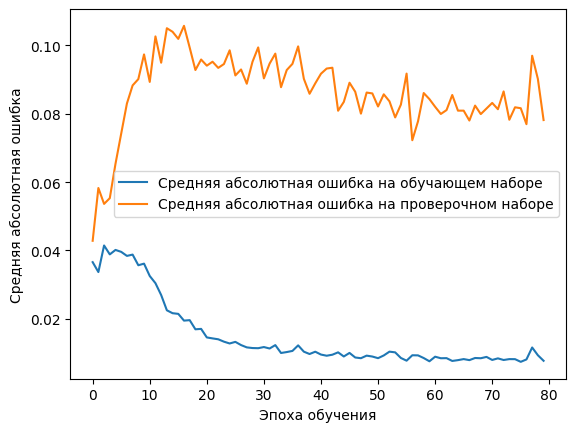

In [ ]:
# Модель определения пригодности соискателя  по данным об образовании
x_train_02, y_train = construct_train_data(fixed_df.values)
# здесь в параметрах maxWordCount = 5000
modelTRez = Sequential()
modelTRez.add(Dense(20, activation='relu',input_dim=(xTrainEduc01.shape[1])))
modelTRez.add(Dense(500, activation='relu'))
modelTRez.add(Dropout(0.3))                             # этим слоем модель отличается от предыдущей
modelTRez.add(Dense(1, activation='linear'))

modelTRez.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = modelTRez.fit(xTrainEduc01[:400],
                    y_train[:400],
                    batch_size=32,
                    epochs=80,
                    validation_data=(xTrainEduc01[400:], y_train[400:]),
                    verbose=1, shuffle=True)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()


Вывод: На несбалансированном датасете не получается добиться приемлемых результатов

На малом количестве данных сбалансированного датасета - получаем эффект переобучения (модель не учится, а просто запоминает классы).

Необходимы методы балансировки входных данных, не уменьшающие их количества.

##### Составная  НС

Собрана связка из 5 НС:
 - НС для работы с категориальными табличными данными по соискателю (вход 1)
 - НС для работы с текстом об текущем месте работы и должности (вход 2)
 - НС для работы с текстом об образовании (вход 3)
 - НС для работы с текстом о ключевых навыках + выполняемые задачи (вход 4)
 - НС для работы с данными "о себе" соискателя (вход 5)



---



In [ ]:
# Балансировка входных данных для обучения

# Заново формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)
xTrainEduc01 = tokenizer.sequences_to_matrix(xTrainEducIndexes)
#  xTrainTProfVectors - используется в этой модели
#  xTrainTSkillsTasksVectors - используется в этой модели
#  xTrainTAboutVectors - используется в этой модели

# Применение oversampling для балансировки выборки
oversampler = RandomOverSampler(random_state=42)

x_resampled_tab_02, y_resampled_tab_02 = oversampler.fit_resample(x_train_02, y_train)
x_resampled_txt_Prof, y_resampled_txt_Prof = oversampler.fit_resample(xTrainTProfVectors, y_train)
x_resampled_txt_Educ, y_resampled_txt_Educ = oversampler.fit_resample(xTrainEduc01, y_train)
x_resampled_txt_SkillsTasks, y_resampled_txt_SkillsTasks = oversampler.fit_resample(xTrainTSkillsTasksVectors, y_train)
x_resampled_txt_About, y_resampled_txt_About = oversampler.fit_resample(xTrainTAboutVectors, y_train)

In [ ]:
# Чтобы убедиться, что размерности данных и целевых значений совпадают, и они готовы для использования в обучении модели:

print(x_resampled_tab_02.shape)  # Размерность данных x_resampled_tab_02
print(y_resampled_tab_02.shape)  # Размерность целевых значений y_resampled_tab_02

print(x_resampled_txt_Prof.shape)  # Размерность данных x_resampled_txt_Prof
print(y_resampled_txt_Prof.shape)  # Размерность целевых значений y_resampled_txt_Prof

print(x_resampled_txt_Educ.shape)  # Размерность данных x_resampled_txt_Educ
print(y_resampled_txt_Educ.shape)  # Размерность целевых значений y_resampled_txt_Educ

print(x_resampled_txt_SkillsTasks.shape)  # Размерность данных x_
print(y_resampled_txt_SkillsTasks.shape)  # Размерность целевых значений y_

print(x_resampled_txt_About.shape)  # Размерность данных x_
print(y_resampled_txt_About.shape)  # Размерность целевых значений y_

(978, 63)
(978,)
(978, 300)
(978,)
(978, 5000)
(978,)
(978, 300)
(978,)
(978, 300)
(978,)


In [ ]:
# Код составной  модели нейросети:

# Создание входных слоев
input1 = Input((x_resampled_tab_02.shape[1],))                    # обучающая выборка по категориальным табличным данным
input2 = Input(shape=(300,), name='x_resampled_txt_Prof')         # обучающая выборка по текстовым данным об текущем месте работы и должности
input3 = Input((x_resampled_txt_Educ.shape[1],))                  # обучающая выборка по текстовым данным об образовании
input4 = Input(shape=(300,), name='x_resampled_txt_SkillsTasks')  # обучающая выборка по текстовым данным о ключевых навыках и задачах
input5 = Input(shape=(300,), name='x_resampled_txt_About')        # обучающая выборка по текстовым данным соискателя о себе

# Ветка х1 (НС для обработки категориальных табличных данных)
x1 = BatchNormalization()(input1)
x1 = Dense(128, activation="relu")(x1)
x1 = Dense(1000, activation="tanh")(x1)
x1 = Dense(100, activation="relu")(x1)

# Ветка х2 (НС для обучения на текстовых данных по текущей работе)
x2 = BatchNormalization()(input2)
x2 = Dense(64, activation="relu")(x2)

# Ветка х3 (НС для обучения на текстовых данных по образованию)
x3 = BatchNormalization()(input3)
x3 = Dense(20, activation="relu")(x3)
x3 = Dense(500, activation="relu")(x3)
x3 = Dropout(0.3)(x3)

# Ветка х4 (НС для обучения на текстовых данных по ключевым навыкам + выполняемым задачам)
x4 = BatchNormalization()(input4)
x4 = Dense(64, activation="relu")(x4)

# Ветка х5 (НС для обучения на текстовых данных по данным соискателя о себе)
x5 = BatchNormalization()(input5)
x5 = Dense(64, activation="relu")(x5)

# Объединение всех пяти веток
x = concatenate([x1, x2, x3, x4, x5])

x = Dense(15, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)           # Финальный нейрон, делает регрессию

# Создание модели
model = Model(inputs=[input1, input2, input3, input4, input5], outputs=x)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# Определение колбэков:
# EarlyStopping с параметром patience=10 и монитором val_loss. Этот колбэк останавливает обучение, если
# значение функции потерь на проверочной выборке не улучшается в течение 10 эпох:
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
# ModelCheckpoint с параметром save_best_only=True и монитором val_loss. Этот колбэк сохраняет только
# лучшую модель на основе значения функции потерь на проверочной выборке:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
# ReduceLROnPlateau с параметрами factor=0.1, patience=5 и монитором val_loss. Этот колбэк  уменьшает скорость
# обучения на 10% в случае, если значение функции потерь на проверочной выборке не улучшается в течение 5 эпох:
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, monitor='val_loss')

# Разделение данных на обучающую и проверочную выборки с использованием сплиттера
x_tab_train, x_tab_val, x_txt_Prof_train, x_txt_Prof_val, x_txt_Educ_train, x_txt_Educ_val, x_txt_SkillsTasks_train, x_txt_SkillsTasks_val, x_txt_About_train, x_txt_About_val, y_tab_train, y_tab_val, y_txt_Prof_train, y_txt_Prof_val, y_txt_Educ_train, y_txt_Educ_val, y_txt_SkillsTasks_train, y_txt_SkillsTasks_val, y_txt_About_train, y_txt_About_val = train_test_split(
    x_resampled_tab_02, x_resampled_txt_Prof, x_resampled_txt_Educ, x_resampled_txt_SkillsTasks, x_resampled_txt_About, y_resampled_tab_02, y_resampled_txt_Prof, y_resampled_txt_Educ, y_resampled_txt_SkillsTasks, y_resampled_txt_About, test_size=0.2, random_state=42
)

# Обучение модели с использованием колбэков:
history = model.fit(
    [x_tab_train, x_txt_Prof_train, x_txt_Educ_train, x_txt_SkillsTasks_train, x_txt_About_train],
    [y_tab_train, y_txt_Prof_train, y_txt_Educ_train, y_txt_SkillsTasks_train, y_txt_About_train],
    epochs=80,
    validation_data=(
        [x_tab_val, x_txt_Prof_val, x_txt_Educ_val, x_txt_SkillsTasks_val, x_txt_About_val],
        [y_tab_val, y_txt_Prof_val, y_txt_Educ_val, y_txt_SkillsTasks_val, y_txt_About_val]
    ),
    verbose=1,
    shuffle=True,
  callbacks=[early_stopping, model_checkpoint, reduce_lr]     # включены все 3 колбэка
  # callbacks=[model_checkpoint, reduce_lr]                     # вЫключен EarlyStopping
)


Epoch 1/80
25/25 [==============================] - 8s 37ms/step - loss: 0.2662 - mae: 0.3853 - val_loss: 0.4214 - val_mae: 0.4945 - lr: 0.0010
Epoch 2/80
25/25 [==============================] - 1s 23ms/step - loss: 0.1354 - mae: 0.2549 - val_loss: 0.2771 - val_mae: 0.4344 - lr: 0.0010
Epoch 3/80
25/25 [==============================] - 0s 19ms/step - loss: 0.1335 - mae: 0.2415 - val_loss: 0.2788 - val_mae: 0.4203 - lr: 0.0010
Epoch 4/80
25/25 [==============================] - 0s 19ms/step - loss: 0.1076 - mae: 0.2206 - val_loss: 0.3069 - val_mae: 0.4353 - lr: 0.0010
Epoch 5/80
25/25 [==============================] - 1s 23ms/step - loss: 0.1048 - mae: 0.2196 - val_loss: 0.2457 - val_mae: 0.3940 - lr: 0.0010
Epoch 6/80
25/25 [==============================] - 0s 18ms/step - loss: 0.1190 - mae: 0.2329 - val_loss: 0.2484 - val_mae: 0.4033 - lr: 0.0010
Epoch 7/80
25/25 [==============================] - 0s 19ms/step - loss: 0.1106 - mae: 0.2290 - val_loss: 0.2506 - val_mae: 0.4003 - lr:

Комментарий к коду выше:

Здесь добавлено сэмплирование данных с использованием метода RandomOverSampler, чтобы сбалансировать датасет. Цель - учить модель на примерно равном количестве примеров положительного и отрицательного классов.

Выполнены следующие шаги:

Импорт класса RandomOverSampler из модуля imblearn.over_sampling (добавлен в сборник библиотек).

Применение oversampling к обучающей выборке, вызывая fit_resample у RandomOverSampler. Цель - сбалансированный набор данных, в котором положительные и отрицательные примеры будут иметь примерно одинаковое количество.

Используем сбалансированный набор данных X_resampled и y_resampled вместо исходных x_train и y_train в вызове model.fit.

При определении входных слоев и их веток выполнены преобразования в соответствии с подобранными моделями.

Т.о, этот код учитывает несбалансированность данных путем применения oversampling и использования сбалансированного набора данных для обучения модели с подобранными НС для данного ДС

Процесс обучения ограничен 80 эпохами, но колбэк останавливает процесс обучения, если не прогресса не происходит.

Модель с лучшими весами записывается в ноутбуке (файл best_model.h5 можно видеть в ячейке"Файлы" слева, если ее раскрыть).



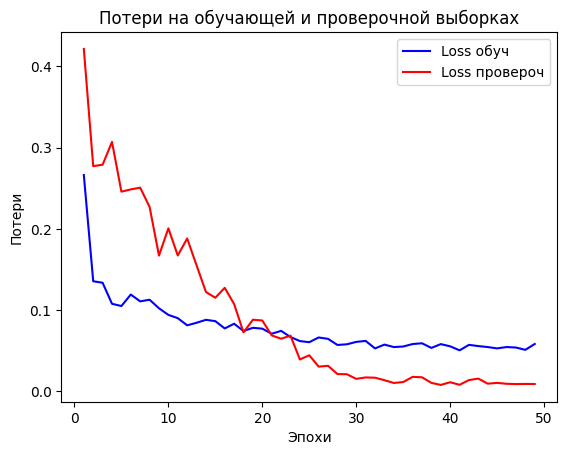

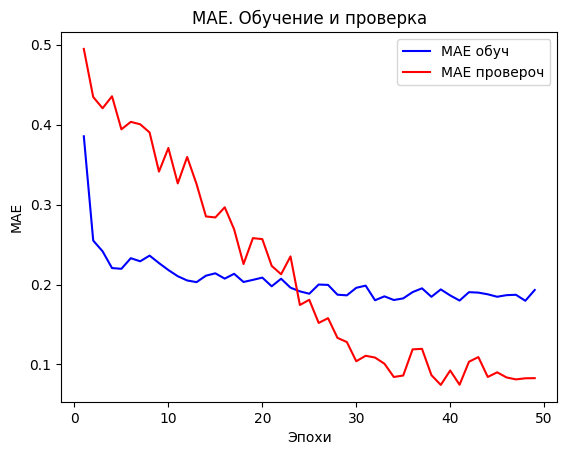

In [ ]:
# Визуализация обучения:

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(loss_values) + 1)

# График функции потерь
plt.figure()
plt.plot(epochs, loss_values, 'b', label= 'Loss обуч')
plt.plot(epochs, val_loss_values, 'r', label='Loss провероч')
plt.title('Потери на обучающей и проверочной выборках')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# График метрики MAE
plt.figure()
plt.plot(epochs, mae_values, 'b', label='MAE обуч')
plt.plot(epochs, val_mae_values, 'r', label='MAE провероч')
plt.title('MAE. Обучение и проверка')
plt.xlabel('Эпохи')
plt.ylabel('MAE')
plt.legend()
plt.show()



In [ ]:
# Оценка модели на проверочной выборке
evaluation_results = model.evaluate(
    [x_tab_val, x_txt_Prof_val, x_txt_Educ_val, x_txt_SkillsTasks_val, x_txt_About_val],
    [y_tab_val, y_txt_Prof_val, y_txt_Educ_val, y_txt_SkillsTasks_val, y_txt_About_val],
    verbose=1
)

# Вывод результатов
print("Loss на проверочных данных:", evaluation_results[0])
print("MAE на проверочных данных:", evaluation_results[1])


7/7 [==============================] - 0s 11ms/step - loss: 0.0077 - mae: 0.0745
Loss на проверочных данных: 0.007696837652474642
MAE на проверочных данных: 0.07446464151144028



## Блок выполнения предсказаний НС
(оценка приемлемости для компании соискателя по его резюме)

Для выполнения предсказаний обученой нейросетью, необходимо подготовить и загрузить в ноутбук файл с резюме, которые необходимо оценить.

Данные из резюме, которые необходимо оценить, должны пройти такую же предобработку как и данные, на которых обучалась нейросеть. Для выполнения этой предобработки используется тот же код ноутбука. Это означает, что структура загружаемого файла с резюме должна быть такой же, как и структура файла Датасета. Последовательность полей в загружаемом файле не имеет значения, но их названия должны быть точно такими же. Смысловая нагрузка полей должна быть такой же. Поле с метками "Подходит/не подходит" может быть не заполнено - при оценке резюме нейросетью его содержимое никак не используется.

Для загрузки файла с резюме на оценку запустите ячейку ниже, после чего, следуя указаниям, необходимо выбрать файл для загрузки.

В результате исполнения блока будет сформирован и записан в ноутбук новый CSV-файл с названием "Результаты оценки.csv", содержимое которого будет отличаться от исходного только наличием нового поля "Предсказание НС" на последней позиции. Содержание поля в отношении каждого из резюме будет содержать качественную (подходит/НЕ подходит) и количественную  ( в %, насколько подходит/не подходит) оценку резюме соискателей.

Сформированный файл можно просмотреть непосредственно в ноутбуке и/или экспортировать его из гугл-колаба на компьютер пользователя.

In [ ]:
# Запуск загрузки резюме на оценку НС
test = get_test_file()

Saving test_dataset_2.xlsx to test_dataset_2 (1).xlsx

Отлично, файл принят!

Запустите блок оценки резюме (ниже) и дождитесь окончания его выполнения (до 1 мин).
По результатам будет собран новый файл "Результаты оценки резюме.csv", содержащий дополнительное поле "оценка резюме НС" на последней позиции.
Экспресс-обзор полученных результатов Вы можете видеть в ячейках раскрытого блока


### Запуск оценки резюме

In [ ]:
# Загрузка и подготовка данных тестового датасета для предсказаний обученной НС

#Убрать лишние столбцы с начала файла:
test_dataset = test.drop(test.columns[0],axis = 1)                    # Убираем первый столбец с продублированными индексами. Он нам не нужен
test_dataset = test_dataset.drop(test_dataset.columns[0],axis = 1)      # Убираем первый столбец с датой отклика. Он нам не нужен
# test_dataset = test_dataset.drop(test_dataset.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен

# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(test_dataset.shape[1]):  # Для каждого из столбцов таблицы
    for i in range(test_dataset.shape[0]): # По всем резюме
        if type(test_dataset.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            test_dataset.values[i][j] = test_dataset.values[i][j].replace("\xa0","")
            test_dataset.values[i][j] = test_dataset.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

# Настройка названий столбцов.
COL_SEX_AGE     = test_dataset.columns.get_loc('Пол, возраст')
COL_SALARY      = test_dataset.columns.get_loc('ЗП')
COL_POS_SEEK    = test_dataset.columns.get_loc('Ищет работу на должность')
COL_CITY        = test_dataset.columns.get_loc('Город')
COL_EMPL        = test_dataset.columns.get_loc('Занятость')
COL_SCHED       = test_dataset.columns.get_loc('График')
COL_EXP         = test_dataset.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = test_dataset.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = test_dataset.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = test_dataset.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = test_dataset.columns.get_loc('Обновление резюме')
СOL_RESULT      = test_dataset.columns.get_loc('Подходит - да/нет')
COL_SKILLS      = test_dataset.columns.get_loc('Ключевые навыки')
COL_TASKS       = test_dataset.columns.get_loc('Выполняемые задачи на прошлых местах работ')
COL_ABOUT       = test_dataset.columns.get_loc('Обо мне')

# Вытаскиваю из дататсета текстовые данные по должности и месту работы для выборки
xTestProf = getXTrainTProf(test_dataset.values)

# Преобразование текста о работе в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestProfVectors = [text_to_vector(text) for text in xTestProf]
xTestProfVectors = np.array(xTestProfVectors)

# Преобразование текста о навыках и задачах в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestSkillsTasks = test_dataset.apply(lambda row: preprocess_skills_tasks(row), axis=1)
xTestSkillsTasksVectors = [text_to_vector(text) for text in xTestSkillsTasks]
xTestSkillsTasksVectors = np.array(xTestSkillsTasksVectors)

# Вытаскиваю из дататсета текстовые данные по образованию для выборки
xTestEduc = getXTrainTEduc(test_dataset.values)

# Преобразование текста в последовательность индексов, согласно частотному словарю созданному при обучении (!!!)
xTestEducIndexes = tokenizer.texts_to_sequences(xTestEduc)            # преобразование текстов в индексы

# Преобразование текста "о себе" в вектор, представляющий собой числовое представление текста, созданное с использованием алгоритма word2vec. Заданная размерность 300
xTestAbout = test_dataset.apply(lambda row: preprocess_about(row), axis=1)
xTestAboutVectors = [text_to_vector(text) for text in xTestAbout]
xTestAboutVectors = np.array(xTestAboutVectors)

# Формирование выборки из загруженного набора простых табличных данных
x_test_02, y_test = construct_train_data(test_dataset.values)

# Преобразование полученной текстовой выборки по образованию из последовательности индексов в матрицы нулей и единиц по принципу Bag of Words:
xTestEduc01 = tokenizer.sequences_to_matrix(xTestEducIndexes)

In [ ]:
# Проверка размерности всех данных на вход для предсказаний
print(x_test_02.shape)
print(xTestProfVectors.shape)
print(xTestEduc01.shape)
print(xTestSkillsTasksVectors.shape)
print(xTestAboutVectors.shape)
print(y_test.shape)


(23, 63)
(23, 300)
(23, 5000)
(23, 300)
(23, 300)
(23,)


In [ ]:
# Получение предсказаний модели на тестовых данных.

predictions = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsTasksVectors, xTestAboutVectors])  # используется та модель, которая которой присвоено имя "model" последней

# Вычисление процентного распределения вероятностей
percentage = predictions * 100

# Формирование колонки "оценка резюме" в формате "подходит % / не подходит %"
evaluation = []
for p in percentage:
  if p >= 50:
    evaluation.append(f"подходит {p[0]:.2f}%")   #Форматирование f-строки поддерживается для обычных числовых типов данных, но не для массивов NumPy.
# Для избежания ошибки в выполении кода  нужно применить форматирование f-строки к каждому элементу массива p в цикле.
# Здесь мы используем p[0], чтобы получить значение из массива p, так как p является массивом с единственным элементом.
  else:
    evaluation.append(f"НЕ подходит {100 - p[0]:.2f}%")

# Добавление колонки "оценка резюме" в тестовый датасет
test_dataset['оценка резюме НС'] = evaluation

# Экспорт тестового датасета в CSV-файл
test_dataset.to_csv('Результаты оценки резюме.csv', index=True) #  Параметр index=False указывает, что индексы строк не должны быть
# включены в выходной CSV-файл.


1/1 [==============================] - 0s 213ms/step


Этим кодом мы сначала получаем предсказания модели на тестовых данных. Затем вычисляем процентное распределение вероятностей, умножая предсказания на 100. Далее, формируем колонку "оценка резюме" в формате "подходит % / не подходит %" для каждого предсказания. Затем, добавляем эту колонку в тестовый датасет.


1/1 [==============================] - 0s 28ms/step


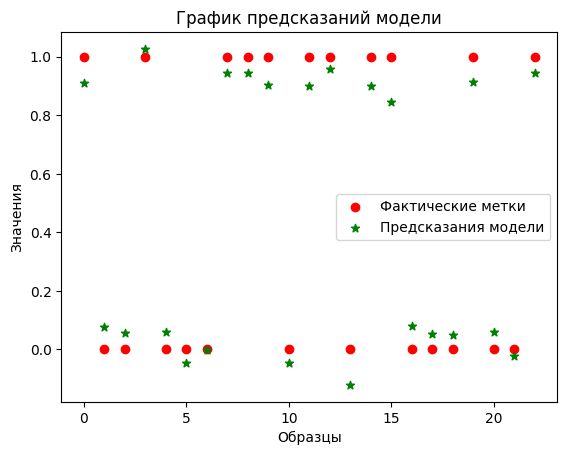

In [ ]:
# Визуализация предсказаний относительно меток, если они были в поле "подходит/не подходит"

# Предсказанные значения модели
#y_pred = model.predict([x_test_02, xTestProfVectors, xTestEduc01,xTestSkillsVectors])
y_pred = model.predict([x_test_02, xTestProfVectors, xTestEduc01, xTestSkillsTasksVectors, xTestAboutVectors])

# Построение графика
plt.scatter(range(len(y_test)), y_test, c='red', marker='o', label='Фактические метки')
plt.scatter(range(len(y_test)), y_pred, c='green', marker='*', label='Предсказания модели')

plt.xlabel('Образцы')
plt.ylabel('Значения')
plt.title('График предсказаний модели')
plt.legend()
plt.show()


In [ ]:
# Посмотрим, как выглядит результат (первые 20 строк)
test_dataset.head(20)

,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Выполняемые задачи на прошлых местах работ,Обо мне,Ключевые навыки,Образование и ВУЗ,Обновление резюме,Подходит - да/нет,оценка резюме НС
0,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,Маркетинговые исследования Исследование рынка;...,NaN,Анализ рынка Управление проектами Product Mana...,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да,подходит 91.01%
1,"Мужчина, 36 лет, родился 22 октября 1986",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —13 лет 7 месяцев,"ООО ""Уральская мясная компания""",Ведущий бизнес аналитик,- Внедрение системы 1С ERP. - Управленческий а...,Дополнительные тренинги: 2008 - компьютерные к...,Бюджетирование Формирование бюджета Управление...,"Высшее, 2009, Стерлитамакская государственная ...",19 января 2023 в 17:09,нет,НЕ подходит 92.46%
2,"Мужчина, 28 лет, родился 18 октября 1994",70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —5 лет 1 месяц,Ростелеком,Супервайзер отдела продаж,"Подключение интернета, заведение заявок, обуче...","Стрессоустойчивый, энергичный, нацелен на резу...",Настройка ПК Управление персоналом Активные пр...,"Высшее, 2016, Башкирский государственный аграр...",31 января 2023 в 09:52,нет,НЕ подходит 94.39%
3,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,Участие в команде роста В2В Задачи: - Развити...,NaN,Самомотивация Таймменеджмент Креативность Чувс...,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да,подходит 102.68%
4,"Женщина, 41 год, родилась 2 декабря 1981",не указана,Product Manager в команду Финансового департам...,"Уфа, Готова к переезду: Москва, Россия, Астрах...",полная занятость,полный день,Опыт работы —17 лет 6 месяцев,"ООО ""НТЦ ""Энергоавтоматизация """,Руководитель планово-экономического отдела,Организация и контроль работы финансовых менед...,NaN,Бюджетирование Финансовый анализ Финансовый ко...,"Высшее, 2008, Уфимский филиал Всероссийского з...",9 февраля 2023 в 06:53,нет,НЕ подходит 93.93%
5,"Женщина, 43 года, родилась 15 марта 1979",70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Готова к переезду: Москва, Екатеринбург, ...",полная занятость,полный день,Опыт работы —23 года 8 месяцев,"ГУСП МТС ""Центральная"" РБ",Начальник отдела казначейства,"- определение задач сотрудников, контроль испо...",Специалист в сфере финансов с общим стажем по ...,Бюджетирование Финансовый контроль Управленчес...,"Высшее, 2001, Московский институт коммерции и ...",8 февраля 2023 в 06:02,нет,НЕ подходит 104.79%
6,"Женщина, 49 лет, родилась 26 октября 1973",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готова к переезду, готова к редким ком...",полная занятость,полный день,Опыт работы —23 года 8 месяцев,ИП Рахметов Э.Э.,Главный бухгалтер,"Полное ведение бухгалтерского , налогового и к...","Коммуникабельная, активная жизненная позиция, ...",NaN,"Высшее, 1996, Уфимский государственный нефтяно...",19 декабря 2022 в 09:34,нет,НЕ подходит 100.23%
7,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,,Запуск бренда и производства игристого кваса D...,"Чем бы 

Теперь Вы можете экспортировать файл с названием "Результаты оценки резюме", содержащий результататы предсказаний  на свой компютер для внешнего использованиия в EXCEL.
Двойной клик по названию файла в окошке слева просто откроет содержимое файла в окошке справа.
Тогда как кликом правой кнопки мыши по названию файла с  выбором опции "Скачать" запустит экспорт файла на Ваш компютер. В зависимости от настроек Вашего компьютера, возможно, понадобится смена кодировки для чтения. Используйте Unicod (UTF-8).

